### 1. Tensors.....

In [1]:
import torch
import numpy as np

Initialising

In [2]:
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

Convert from numpy

In [3]:
arr = np.array(data)
x_data = torch.from_numpy(arr)
x_data

tensor([[1, 2],
        [3, 4]])

From other tensors

In [4]:
x_1 = torch.ones_like(x_data)
x_0 = torch.zeros_like(x_data)

x_1, x_0

(tensor([[1, 1],
         [1, 1]]),
 tensor([[0, 0],
         [0, 0]]))

In [6]:
x_r = torch.rand_like(x_data, dtype=torch.float)
x_r

tensor([[0.2556, 0.0633],
        [0.3536, 0.8195]])

Tensor of a fixed shape

In [7]:
shape = (2, 3)

rand_tensor = torch.rand(shape)
ones_tensor = torch.tensor(shape)
zeros_tensor = torch.tensor(shape)

Attributes of a tensor..

In [8]:
rand_tensor.shape

torch.Size([2, 3])

In [9]:
rand_tensor.dtype

torch.float32

In [10]:
rand_tensor.device

device(type='cpu')

Move tensor to GPU if available

Indexing and Slicing

In [24]:
x = torch.ones(3, 4)
print(x)
print('first row: ', x[0])
print('first col: ', x[:, 0])
print('first element: ', x[0, 0])

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
first row:  tensor([1., 1., 1., 1.])
first col:  tensor([1., 1., 1.])
first element:  tensor(1.)


In [25]:
#set 2nd col to 0
x[:, 1] = 0
x

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

Join tensors along a given axis

In [26]:
x = torch.cat([x, x, x], dim=1)
x

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])

In [27]:
x.shape

torch.Size([3, 12])

Concat along a new dimension

In [32]:
y = torch.stack([x, x], dim=0)
y.shape

torch.Size([2, 3, 12])

In [33]:
print(y)

tensor([[[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
         [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
         [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]],

        [[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
         [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
         [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]]])


In [11]:
if torch.cuda.is_available():
    rand_tensor.to('cuda')

In [36]:
y = torch.stack([x, x], dim=2)
y.shape

torch.Size([3, 12, 2])

In [37]:
print(y)

tensor([[[1., 1.],
         [0., 0.],
         [1., 1.],
         [1., 1.],
         [1., 1.],
         [0., 0.],
         [1., 1.],
         [1., 1.],
         [1., 1.],
         [0., 0.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [0., 0.],
         [1., 1.],
         [1., 1.],
         [1., 1.],
         [0., 0.],
         [1., 1.],
         [1., 1.],
         [1., 1.],
         [0., 0.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [0., 0.],
         [1., 1.],
         [1., 1.],
         [1., 1.],
         [0., 0.],
         [1., 1.],
         [1., 1.],
         [1., 1.],
         [0., 0.],
         [1., 1.],
         [1., 1.]]])


Matrix multiplication

In [39]:
shape = [3, 4]
x = torch.rand(shape)

In [40]:
y1 = x @ x.T

In [41]:
y1

tensor([[2.1705, 1.4155, 1.9742],
        [1.4155, 1.0882, 1.4637],
        [1.9742, 1.4637, 2.5134]])

In [42]:
y2 = torch.matmul(x, x.T)
y2

tensor([[2.1705, 1.4155, 1.9742],
        [1.4155, 1.0882, 1.4637],
        [1.9742, 1.4637, 2.5134]])

In [43]:
y3 = x.matmul(x.T)
y3

tensor([[2.1705, 1.4155, 1.9742],
        [1.4155, 1.0882, 1.4637],
        [1.9742, 1.4637, 2.5134]])

Elementwise multiplication

In [44]:
z1 = x * x
z2 = torch.mul(x, x)
z3 = x.mul(x)

In [49]:
print(torch.eq(z1, z2))
print(torch.eq(z1, z3))

tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])
tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])


Single element tensor

In [50]:
agg = x.sum()
agg = agg.item()
agg

7.753596305847168

In place operations

In [51]:
x.add_(5)
x

tensor([[5.3797, 5.7147, 5.9178, 5.8205],
        [5.5659, 5.2345, 5.6882, 5.4893],
        [5.9797, 5.8726, 5.8594, 5.2314]])

Bridge with numpy

Tensors on cpu and gpu share memory and changing one changes the other

Numpy array created from tensor share memory and vice versa

In [52]:
t = torch.ones([3,3])
n = t.numpy()
n

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

In [53]:
t.add_(1)
n

array([[2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.]], dtype=float32)

Numpy to tensor

In [54]:
n = np.ones(5)
t = torch.from_numpy(n)
t

tensor([1., 1., 1., 1., 1.], dtype=torch.float64)

In [55]:
np.add(n, 1, out=n)
t

tensor([2., 2., 2., 2., 2.], dtype=torch.float64)

************

### 2. Datasets and Dataloaders

torch.utils.data.Dataset stores data and the labels

torch.utils.data.DataLoader wraps an iterable around Dataset

In [2]:
import torch
import numpy as np
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [3]:
train_data = datasets.FashionMNIST(
                                    root='data',
                                    train=True,
                                    download=True,
                                    transform=ToTensor() 
                                )

In [4]:
test_data = datasets.FashionMNIST(
                                    root= 'data',
                                    train=False,
                                    download=True,
                                    transform=ToTensor()
)


In [7]:
dir(train_data)
train_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [19]:
torch.randint(0, len(train_data), size=(1,)).item()

631

Squeeze a tensor to lower dim

In [34]:
image, _ = train_data[234]
image.shape

torch.Size([1, 28, 28])

In [35]:
image.squeeze(0).shape

torch.Size([28, 28])

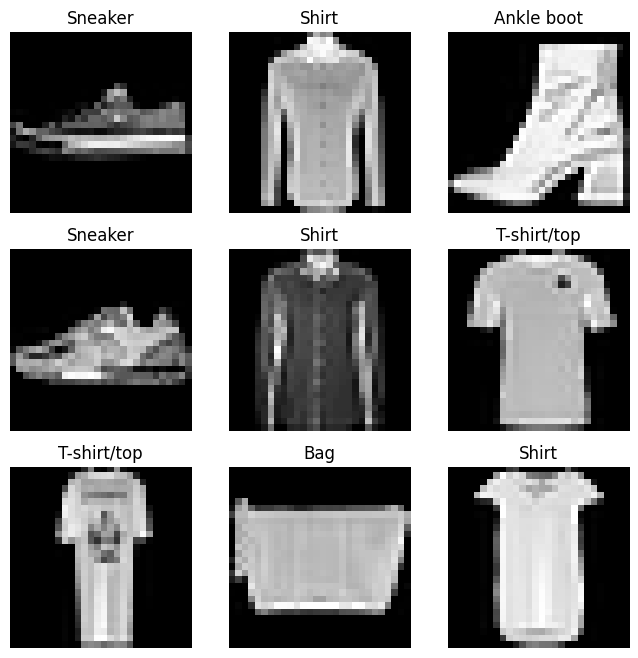

In [36]:
fig = plt.figure(figsize=(8, 8))
rows, cols = 3, 3

for i in range(1, rows*cols+1):
    image_idx = torch.randint(0, len(train_data), size=(1,)).item()
    image, label = train_data[image_idx]
    plt.subplot(rows, cols, i)
    plt.title(train_data.classes[label])
    plt.axis("off")
    plt.imshow(image.squeeze(0), cmap='gray')

plt.show()



Implementing a custom dataset

- Subclasses Dataset module from torch.utls.data
- Must implement these functions: __init__, __len__ and __getitem__

In [39]:
import os
import pandas as pd
from torchvision.io import read_image
from torch.utils.data import DataLoader

In [38]:
class CustomDataset(Dataset):
    def __init__(self,annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label


Dataset fetches data one at a time

Dataloader provides an iterable that can send mini-batches, shuffle etc

In [41]:
train_dataloader = DataLoader(train_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

In [42]:
train_features, train_labels = next(iter(train_dataloader))
print(train_features.size())
print(train_labels.size())

torch.Size([64, 1, 28, 28])
torch.Size([64])


In [43]:
img = train_features[0].squeeze(0)
label = train_labels[0].squeeze(0)

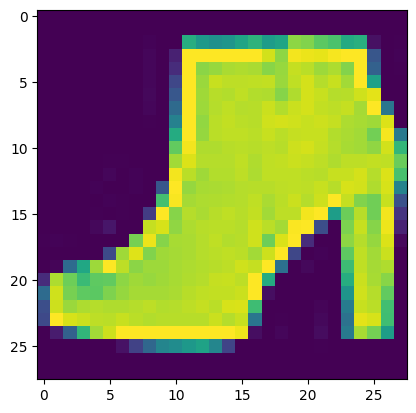

In [44]:
plt.imshow(img)

Transform

ToTensor() converts image or numpy array to tensor and scales it to 0,1

Lambda applies a user defined lambda func to the tensor. Here the integer values in label are converted to a one hot encoded vector. scatter_ assigns value=1 at index loc provided by torch.Tensor(y)

In [47]:
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
                            root='data',
                            download=True,
                            train=True,
                            transform=ToTensor(),
                            target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float)
                                                                .scatter_(0, torch.Tensor(y), value(1)))
                            
)

In [48]:
ds

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
Target transform: Lambda()